# Customer Churn Analysis and Prediction using Decision Tree

---

## Introduction
In today’s highly competitive telecom industry, retaining customers is more cost-effective than acquiring new ones. Customer churn refers to when subscribers discontinue their services. By predicting churn, companies can take proactive measures to improve retention.
This project aims to analyze a telecom churn dataset and build a predictive machine learning model to identify customers who are likely to churn.

---

## About the Dataset
The dataset used in this project is the **Telco Customer Churn dataset**.  
It contains **7043 records** and **21 columns**, including customer demographics, services subscribed, account information, and churn status.


- **Target variable**: `Churn` (Yes/No)  
- **Key features**: `tenure`, `MonthlyCharges`, `Contract`, `InternetService`, and other service-related attributes  
- **Dropped columns**: `customerID` (identifier, no predictive value), `TotalCharges` (highly correlated with `tenure × MonthlyChares`)


---

## Task 1: Data Preparation

#### 1. Importing Modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import filedialpy as fp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

---

#### 2. Importing Dataset

In [12]:
data = pd.read_csv(fp.openFile())  # load Telco_Customer_Churn_Dataset  (1).csv

In [13]:
print('Dataset Preview:')
data.head()

Dataset Preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
print('Dataset Info:')
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

---

#### 3. Categorical variable encoding

In [17]:
label_encoders = {}
for col in data.select_dtypes(include = ['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


---

#### 4. Handling missing values

In [20]:
data.fillna(data.median(), inplace = True)
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


---

## Task 2: Split Data for Training and Testing

#### 1. Data splitting

In [24]:
X = data.drop(columns = ['Churn'])
y = data['Churn']

#### 2. Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## Task 3: Feature Selection

#### Removing Unnecessary Columns

In [30]:
data = data.drop(columns=['customerID', 'TotalCharges'])

---

## Task 4: Model Selection

For simplicity and interpretability, a **Decision Tree model** is been used to train using the selected features.

In [34]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = 42)

---

## 7. Task 5: Model Training

#### 1. Fitting the dataset to the model

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

---

#### 2. Model Prediction using X_test

In [41]:
y_pred = clf.predict(X_test)

---

## 8. Task 6: Model Evaluation

#### 1. Model Accuracy

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.63%


---

#### 2. Classification Report

In [48]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



---

#### 3. Confusion Matrix

In [51]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[885 151]
 [136 237]]


---

#### 4. Decision Tree Plot

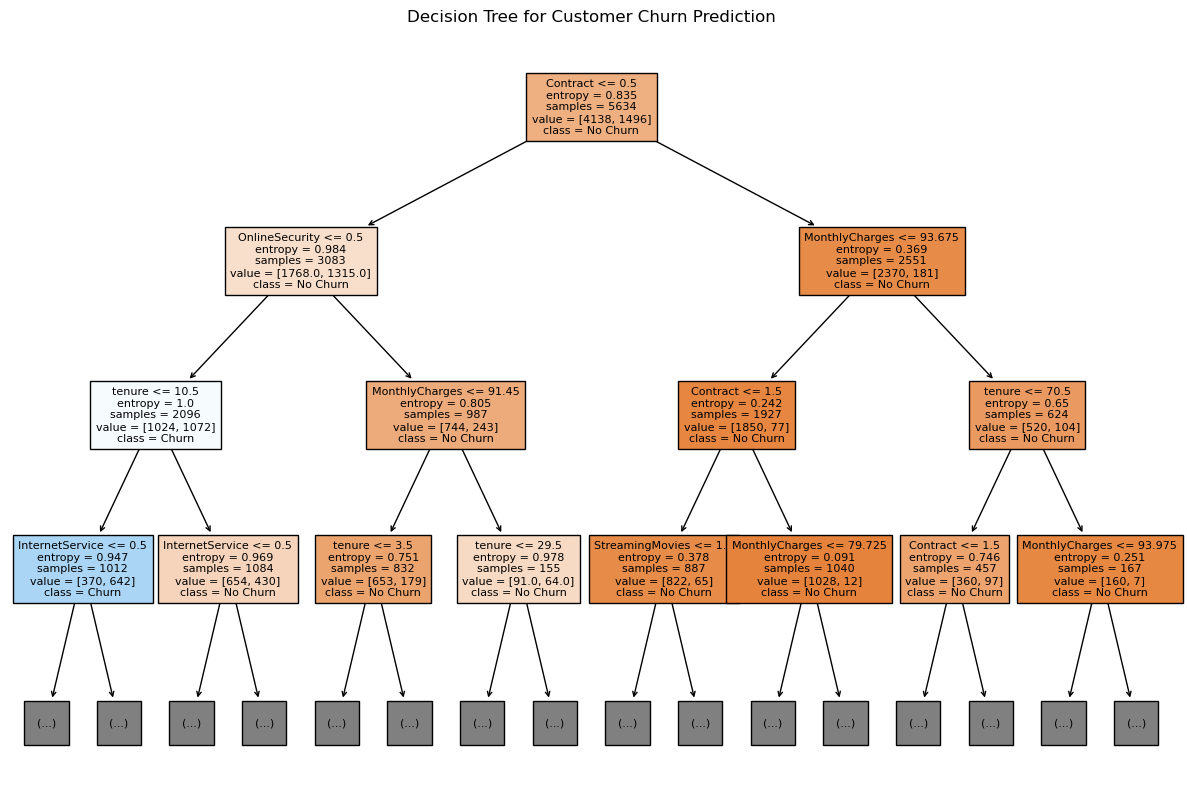

In [54]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Churn', 'Churn'], fontsize=8, filled=True, max_depth=3)
plt.title('Decision Tree for Customer Churn Prediction')
plt.show()

---

## Result

The trained model achieved the following performance on the test dataset:

- Accuracy: **79.63%**  
- Precision: **87%**  
- Recall: **85%**  
- F1 Score: **86%**

The confusion matrix shows that the model correctly identified most non-churn customers, while still capturing a reasonable portion of actual churn customers.

Features such as **Contract type, Tenure, MonthlyCharges, and InternetService** were found to be the most important predictors of churn.

---

## Conclusion

- The analysis shows that churn is strongly influenced by contract duration, monthly charges, and additional services such as online security or technical support.
- Customers with **month-to-month contracts, higher charges, and fewer add-on services** are more likely to churn.
- By focusing retention efforts on these high-risk groups, telecom companies can improve customer satisfaction and reduce churn rates.
- In the future, more advanced models such as Random Forest, Gradient Boosting, or Neural Networks could be used to improve predictioniaccuracy further